<a href="https://colab.research.google.com/github/MinyoungHer/-projects-/blob/main/consumption_data_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 프로젝트 - 일 년간 소비 현황 분석


[분석 배경]
최근에 통장 잔고가 여유가 없어서 경제적으로 많이 여유가 없었다. 돈이 없어서 오는 불안을 처음으로 느꼈던 것 같다. 대학생인 입장에서 수입을 늘릴 방도가 크지 않다는 점에서 소비를 줄여야 한다는 생각이 들었다. 뱅크샐러드, 토스 등 나의 금융 데이터를 분석해주는 앱이 많지만, 더치페이로 해서 송금한 금액등 내가 돈을 쓴 곳이 정확히 어디인지 알기에는 한계가 있었다고 판단했다. 따라서 일 년간 내가 쓴 소비 데이터를 분석해서 앞으로 돈을 쓰는데 있어 효율적인 의사결정을 하는데 도움을 받고자 한다. 


[문제정의] 불필요한 소비 지점을 찾아내고 효율적인 소비 계획 세우기

분석에 사용할 패키지


*   pandas: 데이터 프레임 형태의 데이터를 다룰 수 있는 라이브러리
*   metplotlib: 데이터 시각화와 그래프 플롯에 사용되는 라이브러리
*   seaborn: metplotlib 기반의 시각화 라이브러리



##0.데이터 준비하기


###1)데이터 수집하기

내가 사용할 데이터는 크게 세가지로 이용했다. 
1. kb국민은행 카드 사용내역
2. 카카오페이 결제, 송금 내역
3. 더치페이인 경우 다른 이들에게 송금 받은 내역(국민은행, 카카오페이)
- 더치페이인 경우 내가 결제를 하고 다른 사람들에게 돈을 받았을 것이다. 따라서 위 2개의 지출 내역에 3번의 데이터를 뺄 예정이다.


1. 카드내역은 국민은행 사이트에 들어가서 카드이용실적,혜택 항목을 들어가서 데이터를 받을 수 있었다. 
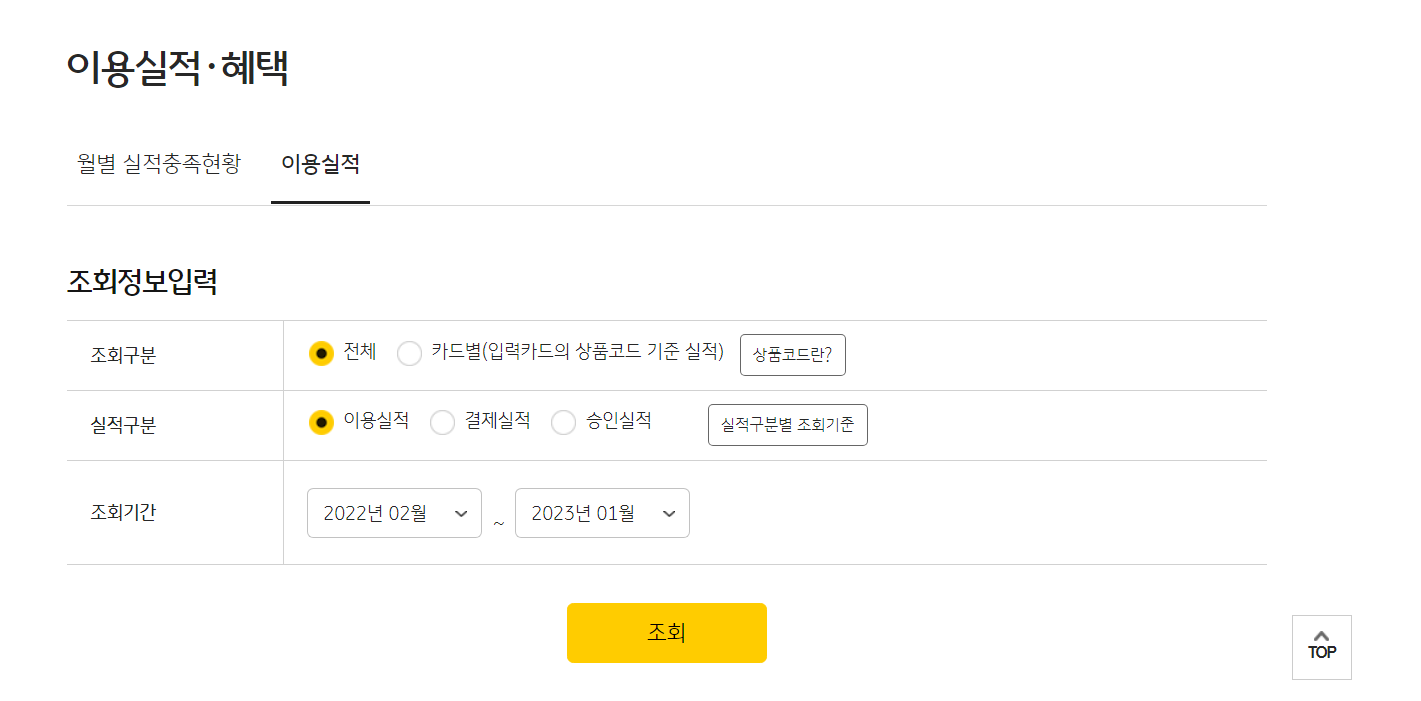

2. 카카오페이 내역 또한 카카오톡에서 요청하면 어럽지 않게 받을 수 있다. 카카오페이 더치페이 내역 또한 포함한 데이터이다.
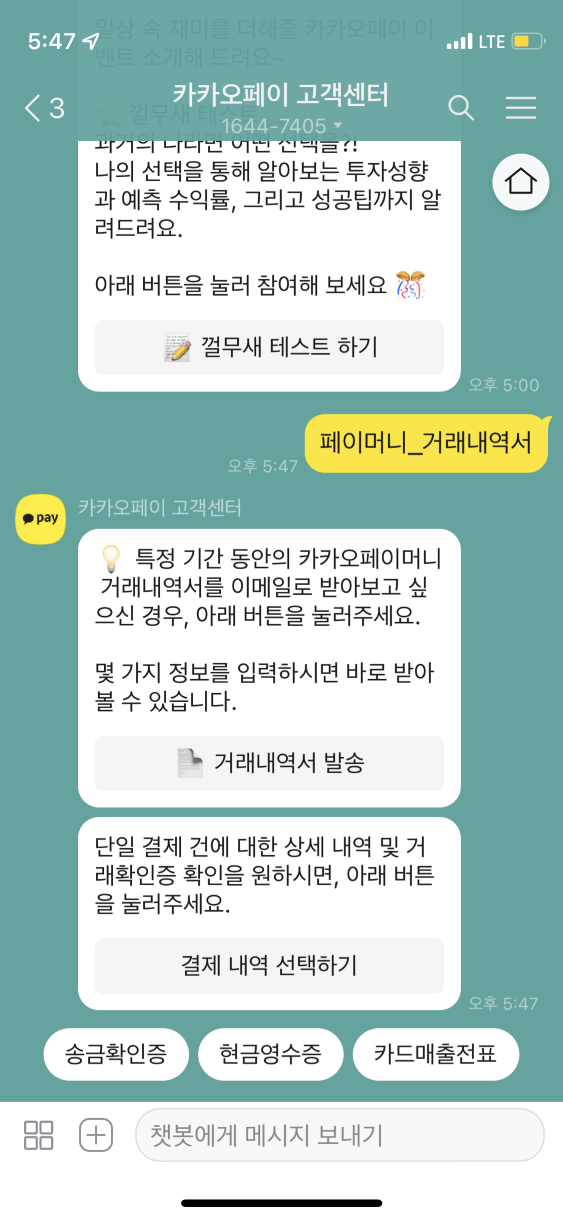

3. 더치페이해서 받은 금액은 카카오페이에도 있지만 내 개인 계좌에도 존재한다. 위의 카드 이용 내역 데이터는 신용카드이므로 이 데이터가 포함 되어있지 않다. 따라서 국민은행 사이트에서 내 개인 계좌에 대한 데이터를 받았다. 
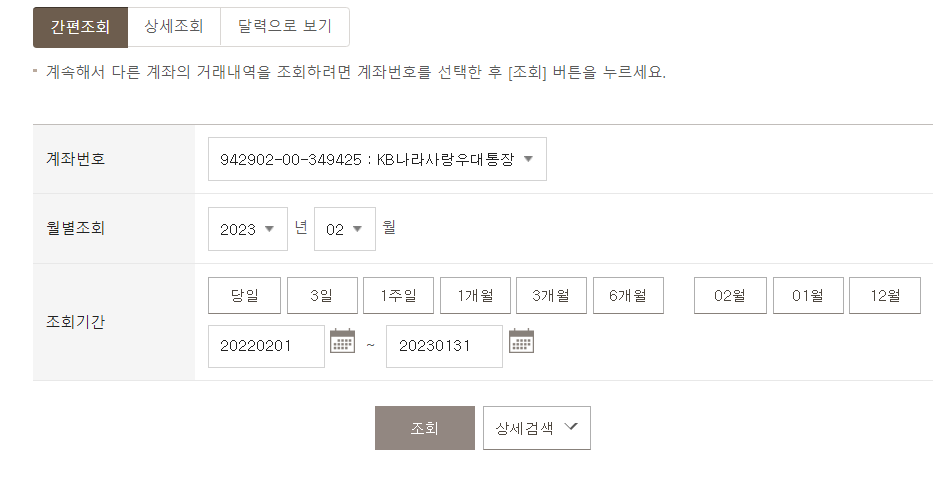

이 세가지 데이터는 모두 엑셀 파일로 받았으며 월세나 관리비와 같은 필수적인 지출은 반영을 하지 않았다.

수집할 데이터 컬럼 정의
1. 결제 날짜: 내가 돈을 쓴 날짜
2. 결재 내역: 어디에 지출을 했는가
3. 결제 금액: 얼마를 지출 했는가
4. 분류 영역: 해당 지출은 어떤 영역에 해당되는가

###2) 데이터 전처리

In [1]:
import pandas as pd

#### 2)-1  카드 지출 내역 데이터



In [2]:
#카드 이용 내역 엑셀 파일을 불러왔다.
cost = pd.read_excel('/content/카드이용내역_20220204_20230204.xls')

In [3]:
cost

,이용일,이용\n시간,Unnamed: 2,이용\n고객명,Unnamed: 4,이용카드명,이용하신곳,국내이용금액\n(원),Unnamed: 8,해외이용금액\n($),...,Unnamed: 11,가맹점\n정보,할인금액,Unnamed: 14,적립(예상)\n포인트리,Unnamed: 16,상태,결제예정일,승인번호,분류영역
0,2023-01-31,21:37,NaN,허민녕,NaN,KB국민 올라운드 티타늄카드,(주)우아한형제들,17900,NaN,0,...,NaN,NaN,0,NaN,179,NaN,전표매입,2023-03-10,30023882,식비(배달)
1,2023-01-26,06:08,NaN,허민녕,NaN,KB국민 올라운드 티타늄카드,버스 18 건,26000,NaN,0,...,NaN,NaN,0,NaN,260,NaN,전표매입,2023-02-10,44191292,교통
2,2023-01-26,06:08,NaN,허민녕,NaN,KB국민 올라운드 티타늄카드,지하철 2 건,2500,NaN,0,...,NaN,NaN,0,NaN,25,NaN,전표매입,2023-02-10,44128443,교통
3,2023-01-25,18:47,NaN,허민녕,NaN,KB국민 올라운드 티타늄카드,쿠팡(쿠페이),21250,NaN,0,...,NaN,NaN,0,NaN,212,NaN,전표매입,2023-02-10,30023860,생필품
4,2023-01-25,18:46,NaN,허민녕,NaN,KB국민 올라운드 티타늄카드,쿠팡(쿠페이),8990,NaN,0,...,NaN,NaN,0,NaN,89,NaN,전표매입,2023-02-10,30023859,생필품
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839,2022-02-09,20:55,NaN,허민녕,NaN,KB국민 올라운드 티타늄카드,쿠팡이츠,7000,NaN,0,...,NaN,NaN,0,NaN,70,NaN,전표매입,2022-03-10,30013761,식비(배달)
840,2022-02-08,19:32,NaN,허민녕,NaN,KB국민 올라운드 티타늄카드,쿠팡이츠,8500,NaN,0,...,NaN,NaN,0,NaN,85,NaN,전표매입,2022-03-10,30013728,식비(배달)
841,2022-02-06,19:28,NaN,허민녕,NaN,KB국민 올라운드 티타늄카드,쿠팡이츠,15600,NaN,0,...,NaN,NaN,0,NaN,156,NaN,전표매입,2022-03-10,30013659,식비(배달)
842,2022-02-06,19:27,NaN,허민녕,NaN,KB국민 올라운드 티타늄카드,쿠팡이츠,15600,NaN,0,...,NaN,NaN,0,NaN,0,NaN,승인취소,NaN,30013649,식비(배달)


In [4]:
cost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 844 entries, 0 to 843
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   이용일          844 non-null    object 
 1   이용
시간        844 non-null    object 
 2   Unnamed: 2   0 non-null      float64
 3   이용
고객명       844 non-null    object 
 4   Unnamed: 4   0 non-null      float64
 5   이용카드명        844 non-null    object 
 6   이용하신곳        844 non-null    object 
 7   국내이용금액
(원)   844 non-null    int64  
 8   Unnamed: 8   0 non-null      float64
 9   해외이용금액
($)   844 non-null    int64  
 10  결제방법         844 non-null    object 
 11  Unnamed: 11  0 non-null      float64
 12  가맹점
정보       13 non-null     object 
 13  할인금액         844 non-null    int64  
 14  Unnamed: 14  0 non-null      float64
 15  적립(예상)
포인트리  844 non-null    int64  
 16  Unnamed: 16  0 non-null      float64
 17  상태           844 non-null    object 
 18  결제예정일        827 non-null    object 
 19  승인번호    

In [5]:
#카드 이용 내역에 불필요한 열들이 많으므로 다음과 같은 네가지로 줄였다.
cost1=cost[['이용일','이용하신곳', '국내이용금액\n(원)','분류영역']]

In [6]:
cost1

,이용일,이용하신곳,국내이용금액\n(원),분류영역
0,2023-01-31,(주)우아한형제들,17900,식비(배달)
1,2023-01-26,버스 18 건,26000,교통
2,2023-01-26,지하철 2 건,2500,교통
3,2023-01-25,쿠팡(쿠페이),21250,생필품
4,2023-01-25,쿠팡(쿠페이),8990,생필품
...,...,...,...,...
839,2022-02-09,쿠팡이츠,7000,식비(배달)
840,2022-02-08,쿠팡이츠,8500,식비(배달)
841,2022-02-06,쿠팡이츠,15600,식비(배달)
842,2022-02-06,쿠팡이츠,15600,식비(배달)


In [7]:
#데이터 분석에 열이름이 영어가 더 용이하므로 영어로 바꿔준다.
cost1.columns=['calendar', 'place', 'cost','domain']


In [8]:
cost1

,calendar,place,cost,domain
0,2023-01-31,(주)우아한형제들,17900,식비(배달)
1,2023-01-26,버스 18 건,26000,교통
2,2023-01-26,지하철 2 건,2500,교통
3,2023-01-25,쿠팡(쿠페이),21250,생필품
4,2023-01-25,쿠팡(쿠페이),8990,생필품
...,...,...,...,...
839,2022-02-09,쿠팡이츠,7000,식비(배달)
840,2022-02-08,쿠팡이츠,8500,식비(배달)
841,2022-02-06,쿠팡이츠,15600,식비(배달)
842,2022-02-06,쿠팡이츠,15600,식비(배달)


In [9]:
#날짜 순서가 거꾸로 되어있으므로 가장 오래된 날짜부터 최신의 날짜 순으로 바꾸어 주었다.
card_cost=cost1.sort_values(by='calendar', ascending='True')

In [10]:
card_cost

,calendar,place,cost,domain
843,2022-02-05,쿠팡이츠,24000,식비(배달)
842,2022-02-06,쿠팡이츠,15600,식비(배달)
841,2022-02-06,쿠팡이츠,15600,식비(배달)
840,2022-02-08,쿠팡이츠,8500,식비(배달)
839,2022-02-09,쿠팡이츠,7000,식비(배달)
...,...,...,...,...
4,2023-01-25,쿠팡(쿠페이),8990,생필품
3,2023-01-25,쿠팡(쿠페이),21250,생필품
2,2023-01-26,지하철 2 건,2500,교통
1,2023-01-26,버스 18 건,26000,교통


In [11]:
#위에서 데이터의 순서를 오름차순으로 바꿔줌으로써 인덱스의 순서도 거꾸로 되었다. 따라서 이를 수정해주는 과정을 시도하였다.
card_cost=card_cost.reset_index().drop('index', axis=1)

In [12]:
card_cost

,calendar,place,cost,domain
0,2022-02-05,쿠팡이츠,24000,식비(배달)
1,2022-02-06,쿠팡이츠,15600,식비(배달)
2,2022-02-06,쿠팡이츠,15600,식비(배달)
3,2022-02-08,쿠팡이츠,8500,식비(배달)
4,2022-02-09,쿠팡이츠,7000,식비(배달)
...,...,...,...,...
839,2023-01-25,쿠팡(쿠페이),8990,생필품
840,2023-01-25,쿠팡(쿠페이),21250,생필품
841,2023-01-26,지하철 2 건,2500,교통
842,2023-01-26,버스 18 건,26000,교통


####2)-2 카카오페이 지출 내역 데이터

In [13]:
#다음은 카카오페이 결제내역의 데이터를 가져왔다.
kakao_cost=pd.read_excel('/content/카카오 페이 결제 내역 2022.02~2023.02.xlsx')

In [14]:
kakao_cost.columns


Index(['거래일시', '거래시간', '거래구분', '거래금액', '은행', '계좌 정보 / 결제 정보', '분류영역'], dtype='object')

In [15]:
kakao_cost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   거래일시           202 non-null    object
 1   거래시간           202 non-null    object
 2   거래구분           202 non-null    object
 3   거래금액           202 non-null    int64 
 4   은행             47 non-null     object
 5   계좌 정보 / 결제 정보  202 non-null    object
 6   분류영역           202 non-null    object
dtypes: int64(1), object(6)
memory usage: 11.2+ KB


In [16]:
#이 또한 불필요한 열이 많으므로 내가 원하는 열들만 골라내어 데이터를 바꾸었다. 
kakao_cost1=kakao_cost[['거래일시', '거래금액', '계좌 정보 / 결제 정보','분류영역']]

In [17]:
# 데이터 분석을 더 용이하게 할 수 있도록 열들의 이름을 영어로 바꾸어 주었다. 
kakao_cost1.rename(columns={'거래일시':'calendar', '거래금액':'cost', '계좌 정보 / 결제 정보':'place','분류영역':'domain'}, inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [18]:
kakao_cost1

,calendar,cost,place,domain
0,2022-02-01,26900,동생,기타
1,2022-02-02,15000,명환,식비
2,2022-02-03,27,펀드 투자,기타
3,2022-02-07,24,펀드 투자,기타
4,2022-02-12,5500,50 R-Play Coins,기타
...,...,...,...,...
197,2023-01-26,24300,골라먹는 셀프마라...,식비
198,2023-01-27,10000,혜지니❤️,식비
199,2023-01-28,3000,***7001 신*근,기타
200,2023-01-31,38500,***3802 (주)큐**,자기계발


In [19]:
kakao_cost1.reindex(['calendar','place','cost','domain'], axis=1)

,calendar,place,cost,domain
0,2022-02-01,동생,26900,기타
1,2022-02-02,명환,15000,식비
2,2022-02-03,펀드 투자,27,기타
3,2022-02-07,펀드 투자,24,기타
4,2022-02-12,50 R-Play Coins,5500,기타
...,...,...,...,...
197,2023-01-26,골라먹는 셀프마라...,24300,식비
198,2023-01-27,혜지니❤️,10000,식비
199,2023-01-28,***7001 신*근,3000,기타
200,2023-01-31,***3802 (주)큐**,38500,자기계발


####2)-3 더치페이 데이터

In [20]:
# 다음은 더치페이 내역이다. 이 데이터는 카카오페이 데이터와 국민은행 계좌 데이터를 합쳐서 한 엑셀 파일로 동시에 갖고왔다.
dtch=pd.read_excel('/content/더치페이 내역.xlsx')

In [21]:
dtch

,거래일시,거래금액,계좌 정보 / 결제 정보
0,2022-02-27,13500,김기훈
1,2022-03-09,16400,유재현
2,2022-03-13,15000,김기훈
3,2022-03-27,19000,김기훈
4,2022-03-27,7500,강지훈
...,...,...,...
111,2023-01-14,30000,승민
112,2023-01-14,25000,재석
113,2023-01-20,11000,이혜진
114,2023-01-22,33300,허민희


In [22]:
#더치페이 내역은 엑셀에서 어느 정도 파일을 내가 필요한 정보들로만 수정을 했기 때문에 불필요한 열이 없다. 따라서 열의 이름을 영어로만 바꾸어주었다.
dtch.columns=['calendar', 'dtch', 'ppl']

In [23]:
dtch=dtch.reindex(['calendar','ppl','dtch'], axis=1)

In [24]:
dtch

,calendar,ppl,dtch
0,2022-02-27,김기훈,13500
1,2022-03-09,유재현,16400
2,2022-03-13,김기훈,15000
3,2022-03-27,김기훈,19000
4,2022-03-27,강지훈,7500
...,...,...,...
111,2023-01-14,승민,30000
112,2023-01-14,재석,25000
113,2023-01-20,이혜진,11000
114,2023-01-22,허민희,33300


####2)-4 최종데이터

In [25]:
#다음은 concat함수를 이용해서 카드이용내역과 카카오이용내역 데이터를 병합하는 과정이다.
cost=pd.concat([card_cost, kakao_cost1])

In [26]:
cost

,calendar,place,cost,domain
0,2022-02-05,쿠팡이츠,24000,식비(배달)
1,2022-02-06,쿠팡이츠,15600,식비(배달)
2,2022-02-06,쿠팡이츠,15600,식비(배달)
3,2022-02-08,쿠팡이츠,8500,식비(배달)
4,2022-02-09,쿠팡이츠,7000,식비(배달)
...,...,...,...,...
197,2023-01-26,골라먹는 셀프마라...,24300,식비
198,2023-01-27,혜지니❤️,10000,식비
199,2023-01-28,***7001 신*근,3000,기타
200,2023-01-31,***3802 (주)큐**,38500,자기계발


In [27]:
# 병합한 cost 데이터를 다시 더치패이 내역 데이터와 위와 같은 방법으로 병합했다.
final_data=pd.concat([cost, dtch])

In [28]:
final_data

,calendar,place,cost,domain,ppl,dtch
0,2022-02-05,쿠팡이츠,24000.0,식비(배달),NaN,NaN
1,2022-02-06,쿠팡이츠,15600.0,식비(배달),NaN,NaN
2,2022-02-06,쿠팡이츠,15600.0,식비(배달),NaN,NaN
3,2022-02-08,쿠팡이츠,8500.0,식비(배달),NaN,NaN
4,2022-02-09,쿠팡이츠,7000.0,식비(배달),NaN,NaN
...,...,...,...,...,...,...
111,2023-01-14,NaN,NaN,NaN,승민,30000.0
112,2023-01-14,NaN,NaN,NaN,재석,25000.0
113,2023-01-20,NaN,NaN,NaN,이혜진,11000.0
114,2023-01-22,NaN,NaN,NaN,허민희,33300.0


In [29]:
# 위 데이터는 일단 결측치가 존재한다. 카카오페이를 통해 결제한 날, 카드로 결제한 날, 더치페이 금액을 받은 날이 같지가 않기 때문이다.
# 따라서 결측치는 모두 0으로 대체했다. 어차피 최종 지출을 파악하는 것이 목표이기 때문에 날짜별로 내가 지출한 금액을 모두 더 한 후, 
# 더치페이한 금액을 모두 빼줄 것이기 때문이다. 따라서 연산을 하기 위해서는 결측치는 그 값이 없다는 뜻이기 때문에 0으로 대체하여야 한다.
final_cost=final_data.fillna(0)

In [30]:
# 앞서 말한 정확한 지출을 파악하기 위해, sum이라는 열을 만들었다. 
# sum은 내가 카드로 지출한 내역과 카카오페이로 지출한 내역을 더한 금액에 더치패이로 다시 받은 금액을 빼주어 정확하게 내가 총 지출한 금액이 된다.
final_cost['sum']=final_cost['cost']-final_cost['dtch']

In [31]:
final_cost

,calendar,place,cost,domain,ppl,dtch,sum
0,2022-02-05,쿠팡이츠,24000.0,식비(배달),0,0.0,24000.0
1,2022-02-06,쿠팡이츠,15600.0,식비(배달),0,0.0,15600.0
2,2022-02-06,쿠팡이츠,15600.0,식비(배달),0,0.0,15600.0
3,2022-02-08,쿠팡이츠,8500.0,식비(배달),0,0.0,8500.0
4,2022-02-09,쿠팡이츠,7000.0,식비(배달),0,0.0,7000.0
...,...,...,...,...,...,...,...
111,2023-01-14,0,0.0,0,승민,30000.0,-30000.0
112,2023-01-14,0,0.0,0,재석,25000.0,-25000.0
113,2023-01-20,0,0.0,0,이혜진,11000.0,-11000.0
114,2023-01-22,0,0.0,0,허민희,33300.0,-33300.0


In [32]:
#다만 아까 데이터 병합과정에서 각 데이터가 그대로 붙여졌기 때문에 날짜가 순서에 맞지 않다. 따라서 위 데이터의 순서를 다시 날짜 순으로 변경해주었다.
final_cost=final_cost.sort_values(by='calendar', ascending='True')

In [33]:
# 데이터 순서를 변경하는 과정에서 바뀌는 인덱스를 조정해주었다.
final_cost=final_cost.reset_index().drop('index', axis=1)

In [34]:
final_cost

,calendar,place,cost,domain,ppl,dtch,sum
0,2022-02-01,동생,26900.0,기타,0,0.0,26900.0
1,2022-02-01,0,0.0,0,허민희,26900.0,-26900.0
2,2022-02-01,0,0.0,0,허민희,13250.0,-13250.0
3,2022-02-02,명환,15000.0,식비,0,0.0,15000.0
4,2022-02-03,펀드 투자,27.0,기타,0,0.0,27.0
...,...,...,...,...,...,...,...
1157,2023-01-27,혜지니❤️,10000.0,식비,0,0.0,10000.0
1158,2023-01-28,***7001 신*근,3000.0,기타,0,0.0,3000.0
1159,2023-01-31,(주)우아한형제들,17900.0,식비(배달),0,0.0,17900.0
1160,2023-01-31,***3802 (주)큐**,346500.0,자기계발,0,0.0,346500.0


In [35]:
#날짜를 년, 월, 일로 분리하기 위해 정규식을 사용한 과정이다.
y_m_d=final_cost['calendar'].str.extract("([0-9]+).\s*([0-9]+).\s*([0-9]+)")

In [36]:
y_m_d.columns=['year', 'month', 'day']

In [37]:
y_m_d

,year,month,day
0,2022,02,01
1,2022,02,01
2,2022,02,01
3,2022,02,02
4,2022,02,03
...,...,...,...
1157,2023,01,27
1158,2023,01,28
1159,2023,01,31
1160,2023,01,31


In [38]:
import datetime
date=datetime.date.today()


In [39]:
# 다음은 날짜에 따른 요일을 파악하기 위한 과정이다. 예) 2022년 5월 15일은 무슨 요일인지 알기 위한 과정
weekday=[]

for i in y_m_d.index:
  weekday.append(datetime.date(int(y_m_d['year'][i]),int(y_m_d['month'][i]),int(y_m_d['day'][i])).weekday())

In [40]:
y_m_d['weekday']=weekday

In [41]:
#마지막으로 이렇게 구한 날짜 분리 데이터, 요일 데이터, 그리고 앞서 가공한 내 소비 데이터를 병합하였다.
last=pd.concat([final_cost, y_m_d], axis=1)

In [42]:
last

,calendar,place,cost,domain,ppl,dtch,sum,year,month,day,weekday
0,2022-02-01,동생,26900.0,기타,0,0.0,26900.0,2022,02,01,1
1,2022-02-01,0,0.0,0,허민희,26900.0,-26900.0,2022,02,01,1
2,2022-02-01,0,0.0,0,허민희,13250.0,-13250.0,2022,02,01,1
3,2022-02-02,명환,15000.0,식비,0,0.0,15000.0,2022,02,02,2
4,2022-02-03,펀드 투자,27.0,기타,0,0.0,27.0,2022,02,03,3
...,...,...,...,...,...,...,...,...,...,...,...
1157,2023-01-27,혜지니❤️,10000.0,식비,0,0.0,10000.0,2023,01,27,4
1158,2023-01-28,***7001 신*근,3000.0,기타,0,0.0,3000.0,2023,01,28,5
1159,2023-01-31,(주)우아한형제들,17900.0,식비(배달),0,0.0,17900.0,2023,01,31,1
1160,2023-01-31,***3802 (주)큐**,346500.0,자기계발,0,0.0,346500.0,2023,01,31,1


In [43]:
#다만 열의 순서가 뒤죽박죽이므로 내가 원하는 순서대로 보기 좋기 바꾸어주었다.
last=last.reindex(['calendar','year','month','day','weekday', 'place', 'cost','ppl','dtch','sum','domain'], axis=1)

In [44]:
#데이터의 최종본이 나왔다. 
last

,calendar,year,month,day,weekday,place,cost,ppl,dtch,sum,domain
0,2022-02-01,2022,02,01,1,동생,26900.0,0,0.0,26900.0,기타
1,2022-02-01,2022,02,01,1,0,0.0,허민희,26900.0,-26900.0,0
2,2022-02-01,2022,02,01,1,0,0.0,허민희,13250.0,-13250.0,0
3,2022-02-02,2022,02,02,2,명환,15000.0,0,0.0,15000.0,식비
4,2022-02-03,2022,02,03,3,펀드 투자,27.0,0,0.0,27.0,기타
...,...,...,...,...,...,...,...,...,...,...,...
1157,2023-01-27,2023,01,27,4,혜지니❤️,10000.0,0,0.0,10000.0,식비
1158,2023-01-28,2023,01,28,5,***7001 신*근,3000.0,0,0.0,3000.0,기타
1159,2023-01-31,2023,01,31,1,(주)우아한형제들,17900.0,0,0.0,17900.0,식비(배달)
1160,2023-01-31,2023,01,31,1,***3802 (주)큐**,346500.0,0,0.0,346500.0,자기계발


##1.데이터 분석하기

###0)기본통계

In [45]:
last.describe()

,weekday,cost,dtch,sum
count,1162.000000,1162.000000,1162.000000,1162.000000
mean,2.983649,12470.152324,1386.461274,11083.691050
std,1.926891,33647.996414,5118.462939,34539.757899
min,0.000000,0.000000,0.000000,-67800.000000
25%,1.000000,1000.000000,0.000000,1000.000000
50%,3.000000,5000.000000,0.000000,5000.000000
75%,5.000000,14000.000000,0.000000,14000.000000
max,6.000000,660000.000000,67800.000000,660000.000000


데이터의 기본 통계를 살펴보면 평균적인 지출은 11291원이다. 

즉, 내가 한 건당 지출한 금액은 1,2470원이라는 뜻이다.

이 밖에도 내가 한 번에 가장 많이 지출한 금액은 66만원이다. 

무엇에 이렇게 큰 돈을 썼는지 궁금해 확인해보았다.

In [46]:
last[last['cost']==660000]

,calendar,year,month,day,weekday,place,cost,ppl,dtch,sum,domain
1028,2022-12-17,2022,12,17,5,***7002 주식회사 메타코**,660000.0,0,0.0,660000.0,자기계발


결과를 확인해보니 첫번째는 메타코드에서 데이터 분석 과정 관련해서 결제를 한 것이었다. 강의에 관한 지출이니 금액이 큰 것이 이해가 갔다.

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

In [48]:
# 다음은 하루에 쓴 총 금액을 알고 싶어 날짜별로 groupby함수를 써서 묶었다.
last1=last.groupby('calendar').sum().drop('weekday', axis=1)
last1

,cost,dtch,sum
calendar,,,
2022-02-01,26900.0,40150.0,-13250.0
2022-02-02,15000.0,0.0,15000.0
2022-02-03,27.0,0.0,27.0
2022-02-05,24000.0,0.0,24000.0
2022-02-06,31200.0,0.0,31200.0
...,...,...,...
2023-01-25,68540.0,0.0,68540.0
2023-01-26,73800.0,21000.0,52800.0
2023-01-27,10000.0,0.0,10000.0


In [49]:
last['sum'].sum()

12879249.0

내가 일년동안 총 쓴 금액은 1287만원 정도였다.

In [50]:
last1['sum'].mean()

38792.9186746988

하루에 쓴 총날의 평균을 보니 하루 총 평균 38,792원을 지출하였다. 
대학생인 점을 고려했을 때, 생각보다 큰 금액이라고 느꼈다.

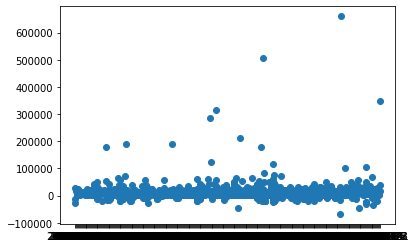

In [51]:
plt.scatter(last['calendar'], last['sum'])
plt.show()

위 그래프는 전체적인 자료의 분포를 알고 싶어 실행해 보았다. 대체적으로는 하루의 지출이 10만원 이상을 하지 않는다. 20만원까지의 지출은 그래도 보이지만 그래도 그 이상의 지출은 1년에 손에 꼽는다. 따라서 이 이상치들이 무엇인지 알고 싶었다.

In [52]:
last[last['sum']>200000]

,calendar,year,month,day,weekday,place,cost,ppl,dtch,sum,domain
381,2022-07-22,2022,07,22,4,뮤즈의원,284900.0,0,0.0,284900.0,패션/미용
411,2022-07-29,2022,07,29,4,(주)케이엘에스아카데미,316000.0,0,0.0,316000.0,자기계발
502,2022-08-25,2022,08,25,3,크림 주식회사,210000.0,0,0.0,210000.0,패션/미용
666,2022-09-20,2022,09,20,1,미니멀 소프트 울 자켓 [MELANGE BROWN] 외 6건,505166.0,0,0.0,505166.0,패션/미용
1028,2022-12-17,2022,12,17,5,***7002 주식회사 메타코**,660000.0,0,0.0,660000.0,자기계발
1160,2023-01-31,2023,01,31,1,***3802 (주)큐**,346500.0,0,0.0,346500.0,자기계발


확인해보니 앞서 확인한 강의 외에 총 5가지 경우가 더 있었다.

*   뮤즈의원- 피부과인데 내가 수염제모를 하기 위해 거금을 지불한 것으로 보인다.
*   크림- 당시 20만원짜리로 가격이 조금 나가는 향수를 구매한 기억이 난다.

*   9월 20일에는 무신사에서 옷을 구매했었는데 조금 지출을 해서 50만원 정도가 나왔다.
* (주)케이엘에스아카데미- 여름방학 때 토플 공부를 위해 결제한 강의이다. 
*   마지막으로 큐링크라는 곳에서 34만6500원을 결제 했는데 이는 대학원 관련 컨설팅 비용이다.




보면 알겠지만 내가 위 거금을 들여 지출한 4가지 경우는 7월부터 9월이다. 특히 개인적인 만족을 위해 산 경우가 많은데 이렇게 지출할 수 있었던 이유는 당시에 내가 방학때(7월, 8월) 알바를 하고 있어서 나름 지갑 사정이 두둑했던 것으로 보인다. 

정리해보면 내가 평소보다 한번에 많은 지출을 하는 쪽은 강의, 컨설팅, 패션 쪽의 항목인 것을 확인할 수 있었다.

###1) 요일별 분석

요일 별로 지출이 다른지에 대한 비교를 하고 싶었다. 

예상에는 상대적으로 주말에 지출이 더 많을 것 같았는데 실제로도 그런지 확인해보고 싶었다.

#####1)-1 요일별 지출

In [53]:
#지출관련하여 요일별로 합하여 묶었다.
week_spent=last.groupby('weekday').sum()

In [54]:
week_spent

,cost,dtch,sum
weekday,,,
0,1304354.0,195700.0,1108654.0
1,2526391.0,120450.0,2405941.0
2,1870120.0,95620.0,1774500.0
3,2373077.0,211000.0,2162077.0
4,2405020.0,408366.0,1996654.0
5,2452295.0,225900.0,2226395.0
6,1559060.0,354032.0,1205028.0


In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

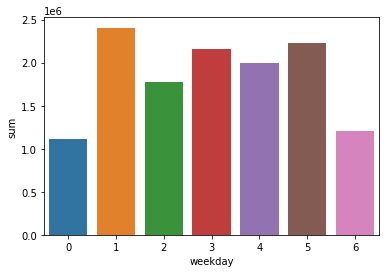

In [56]:
sns.barplot(x=week_spent.index, y=week_spent['sum'])

- 요일별로 지출 총합을 합산해 그래프로 나타내 보니 예상외로 화요일날 가장 많은 지출을 한 것을 알 수 있었다. 그리고 예상외로 일요일이 주말인데도 불구하고 지출이 많이 낮았던 것을 알 수 있었다. 

- 요일 당 지출:
화>토>목>금>수>일>월

그렇다면 내가 화욜날 주로 어떤 소비를 했는지 알고 싶었다.

In [57]:
last[last['weekday']==1]

,calendar,year,month,day,weekday,place,cost,ppl,dtch,sum,domain
0,2022-02-01,2022,02,01,1,동생,26900.0,0,0.0,26900.0,기타
1,2022-02-01,2022,02,01,1,0,0.0,허민희,26900.0,-26900.0,0
2,2022-02-01,2022,02,01,1,0,0.0,허민희,13250.0,-13250.0,0
9,2022-02-08,2022,02,08,1,쿠팡이츠,8500.0,0,0.0,8500.0,식비(배달)
17,2022-02-15,2022,02,15,1,쿠팡이츠,13000.0,0,0.0,13000.0,식비(배달)
...,...,...,...,...,...,...,...,...,...,...,...
1145,2023-01-24,2023,01,24,1,마블PC,5000.0,0,0.0,5000.0,취미(게임)
1146,2023-01-24,2023,01,24,1,모빌-ARS,3000.0,0,0.0,3000.0,기타
1159,2023-01-31,2023,01,31,1,(주)우아한형제들,17900.0,0,0.0,17900.0,식비(배달)
1160,2023-01-31,2023,01,31,1,***3802 (주)큐**,346500.0,0,0.0,346500.0,자기계발


- 확인해보면 내가 예전에 크로스핏이라는 운동을 했었는데 한 달에 한 18만원에서 20만원 정도 했었다. 이 금액을 화요일날 결제를 한 내역이 몇개 보인다. 내가 4개월 정도 했으니 4번의 결제를 했을텐데 2개가 화요일에 있으니 화요일 금액이 크게 나타난 것이 아닌가하는 생각이 든다.
- 또한 옷을 50만원어치 샀었다. 
- 그리고 앞서 말한 큐링크 대학원 컨설팅 비용 또한 화요일이었다. 따라서 큰 지출이 많아서 화요일에 많은 지출을 한 것 같다.

그렇다면 평균적으로 한 건당 큰 소비를 한 요일은 어떨지 궁금해 확인해 보았다.

In [58]:
week_spent1=last.groupby('weekday').mean()

In [59]:
week_spent1

,cost,dtch,sum
weekday,,,
0,8995.544828,1349.655172,7645.889655
1,13881.269231,661.813187,13219.456044
2,11543.950617,590.246914,10953.703704
3,13796.959302,1226.744186,12570.215116
4,11674.854369,1982.359223,9692.495146
5,16458.355705,1516.107383,14942.248322
6,10678.493151,2424.876712,8253.616438


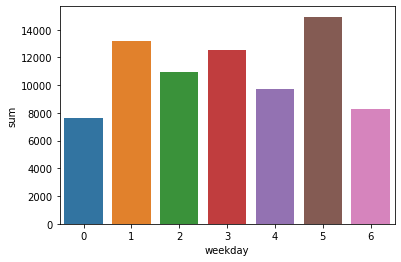

In [60]:
sns.barplot(x=week_spent1.index, y=week_spent1['sum'])

- 평균으로 계산해보니 순서가 조금 바뀌었다. 한 번 결제를 할 때 많이 하는 경우는 다음과 같다.


- 토>화>목>수>금>일>월

In [61]:
last[last['weekday']==5]

,calendar,year,month,day,weekday,place,cost,ppl,dtch,sum,domain
5,2022-02-05,2022,02,05,5,쿠팡이츠,24000.0,0,0.0,24000.0,식비(배달)
14,2022-02-12,2022,02,12,5,이니시스(빌링),1210.0,0,0.0,1210.0,기타
15,2022-02-12,2022,02,12,5,50 R-Play Coins,5500.0,0,0.0,5500.0,기타
24,2022-02-19,2022,02,19,5,쿠팡이츠,14900.0,0,0.0,14900.0,식비(배달)
43,2022-02-26,2022,02,26,5,현장발권-S,3600.0,0,0.0,3600.0,교통
...,...,...,...,...,...,...,...,...,...,...,...
1125,2023-01-14,2023,01,14,5,캠퍼스안경원,50000.0,0,0.0,50000.0,패션/미용
1139,2023-01-21,2023,01,21,5,쿠팡(쿠페이),66420.0,0,0.0,66420.0,생필품
1140,2023-01-21,2023,01,21,5,스타벅스_일반,10000.0,0,0.0,10000.0,카페
1141,2023-01-21,2023,01,21,5,마블PC,3000.0,0,0.0,3000.0,취미(게임)


토요일 지출 내역을 확인해보면 주말이라 주로 배달과 술을 많이 마시는 경우가 많았기 때문에 그 평균 지출이 상승한 것으로 보인다.

그렇다면 15만원이상의 일반적이지 않은 지출을 제외한 평소의 지출은 어떻게 될지 궁금해 확인해보았다.

####1)-2 요일별 지출(큰 지출 제외)

In [62]:
data=last[last['sum']<150000]

In [63]:
data

,calendar,year,month,day,weekday,place,cost,ppl,dtch,sum,domain
0,2022-02-01,2022,02,01,1,동생,26900.0,0,0.0,26900.0,기타
1,2022-02-01,2022,02,01,1,0,0.0,허민희,26900.0,-26900.0,0
2,2022-02-01,2022,02,01,1,0,0.0,허민희,13250.0,-13250.0,0
3,2022-02-02,2022,02,02,2,명환,15000.0,0,0.0,15000.0,식비
4,2022-02-03,2022,02,03,3,펀드 투자,27.0,0,0.0,27.0,기타
...,...,...,...,...,...,...,...,...,...,...,...
1156,2023-01-26,2023,01,26,3,골라먹는 셀프마라...,24300.0,0,0.0,24300.0,식비
1157,2023-01-27,2023,01,27,4,혜지니❤️,10000.0,0,0.0,10000.0,식비
1158,2023-01-28,2023,01,28,5,***7001 신*근,3000.0,0,0.0,3000.0,기타
1159,2023-01-31,2023,01,31,1,(주)우아한형제들,17900.0,0,0.0,17900.0,식비(배달)


In [64]:
week_spent2=data['sum'].groupby(last['weekday']).sum()

In [65]:
week_spent2

weekday
0    1108654.0
1    1374275.0
2    1584500.0
3    1762077.0
4    1395754.0
5    1566395.0
6    1025028.0
Name: sum, dtype: float64

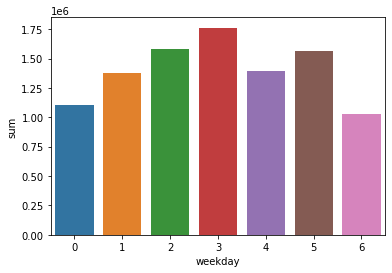

In [66]:
sns.barplot(x=week_spent2.index, y=week_spent2)

- 확인해보니 이번에는 목요일이 가장 큰 지출을 한 요일로 바뀐 것을 확인 할 수 있다. 

- 큰 지출 제외 요일 별 지출:
목>수>금>화>토>월>일

In [67]:
week_spent3=data['sum'].groupby(last['weekday']).mean()

In [68]:
week_spent3

weekday
0     7645.889655
1     7677.513966
2     9841.614907
3    10365.158824
4     6841.931373
5    10583.750000
6     7069.158621
Name: sum, dtype: float64

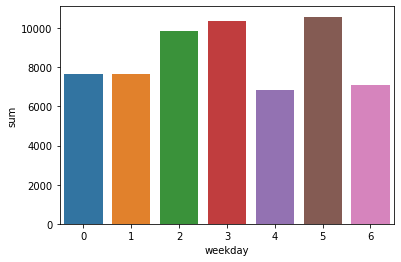

In [69]:
sns.barplot(x=week_spent3.index, y=week_spent3)

- 평균으로 보면 토요일 지출이 가장 크다. 그 다음으로는 목요일과 수요일 순으로 가장 지출이 많은 요일 3개는 변함이 없었다.

- 큰 지출 제외 요일 별 평균 지출:
목>수>토>화>일>금>월

- 특히나 일요일은 꾸준히 가장 지출이 적은 날로 나타난다.

In [70]:
data[data['weekday']==3]

,calendar,year,month,day,weekday,place,cost,ppl,dtch,sum,domain
4,2022-02-03,2022,02,03,3,펀드 투자,27.0,0,0.0,27.0,기타
11,2022-02-10,2022,02,10,3,쿠팡이츠,8900.0,0,0.0,8900.0,식비(배달)
12,2022-02-10,2022,02,10,3,쿠팡이츠,12000.0,0,0.0,12000.0,식비(배달)
19,2022-02-17,2022,02,17,3,쿠팡(와우 멤버십),2900.0,0,0.0,2900.0,취미
20,2022-02-17,2022,02,17,3,엔젤북카페강남2호점,3000.0,0,0.0,3000.0,카페
...,...,...,...,...,...,...,...,...,...,...,...
1152,2023-01-26,2023,01,26,3,0,0.0,이혜진,21000.0,-21000.0,0
1153,2023-01-26,2023,01,26,3,지하철 2 건,2500.0,0,0.0,2500.0,교통
1154,2023-01-26,2023,01,26,3,버스 18 건,26000.0,0,0.0,26000.0,교통
1155,2023-01-26,2023,01,26,3,수육국밥외 1,21000.0,0,0.0,21000.0,식비


확인해보면 주로 외식 관련 지출이 컸다. 

In [71]:
data[data['weekday']==3].sort_values('sum', ascending=False)

,calendar,year,month,day,weekday,place,cost,ppl,dtch,sum,domain
338,2022-07-07,2022,07,07,3,순(SOON)생막창,59500.0,0,0.0,59500.0,식비
173,2022-05-05,2022,05,05,3,쿠팡(쿠페이),58900.0,0,0.0,58900.0,생필품
1092,2023-01-05,2023,01,05,3,지에스25 청주포빌점,55500.0,0,0.0,55500.0,편의점
951,2022-12-01,2022,12,01,3,캠퍼스안경원,50000.0,0,0.0,50000.0,패션/미용
475,2022-08-18,2022,08,18,3,마블(MARVEL) 당구장,50000.0,0,0.0,50000.0,담배
...,...,...,...,...,...,...,...,...,...,...,...
683,2022-09-22,2022,09,22,3,0,0.0,전서희,21000.0,-21000.0,0
1152,2023-01-26,2023,01,26,3,0,0.0,이혜진,21000.0,-21000.0,0
685,2022-09-22,2022,09,22,3,0,0.0,이지연,21000.0,-21000.0,0
893,2022-11-17,2022,11,17,3,0,0.0,이혜진,21000.0,-21000.0,0


토요일도 확인해보면 거의 모두 외식, 배달과 관련된 지출들이 많았다.

In [72]:
data[data['weekday']==5].sort_values('sum', ascending=False)

,calendar,year,month,day,weekday,place,cost,ppl,dtch,sum,domain
384,2022-07-23,2022,07,23,5,주식회사 위팬(WeFAN),125000.0,0,0.0,125000.0,패션/미용
718,2022-10-01,2022,10,01,5,열린마트,115370.0,0,0.0,115370.0,식비
1120,2023-01-14,2023,01,14,5,강남찌개집,105200.0,0,0.0,105200.0,식비
1139,2023-01-21,2023,01,21,5,쿠팡(쿠페이),66420.0,0,0.0,66420.0,생필품
485,2022-08-20,2022,08,20,5,가희양꼬치,63000.0,0,0.0,63000.0,식비
...,...,...,...,...,...,...,...,...,...,...,...
723,2022-10-01,2022,10,01,5,0,0.0,김민기,15000.0,-15000.0,0
1119,2023-01-14,2023,01,14,5,0,0.0,재석,25000.0,-25000.0,0
717,2022-10-01,2022,10,01,5,0,0.0,최웅선,25000.0,-25000.0,0
1117,2023-01-14,2023,01,14,5,0,0.0,안재욱,25000.0,-25000.0,0


결론을 내보면 평상시 일반적인 큰 지출 외에 보통 외식 혹은 배달 지출을 많이 한 요일이 상대적으로 지출 수치가 높게 나타났다는 생각이 든다.
하지만, 특별히 요일에 따라 특정한 지출이 나타나지는 않는다는 점에서 큰 패턴을 찾기는 어려웠다.

###2)월별 분석

In [73]:
month_spent=last['sum'].groupby(last['month']).sum()

In [74]:
month_spent

month
01    1415620.0
02     625001.0
03     662585.0
04     524255.0
05     492622.0
06     669270.0
07    1728470.0
08    1307660.0
09    1958606.0
10     891890.0
11     736320.0
12    1866950.0
Name: sum, dtype: float64

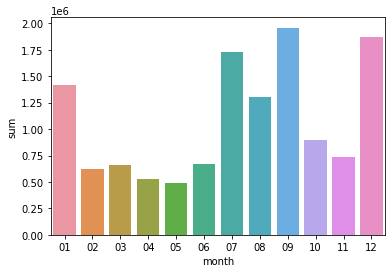

In [75]:
sns.barplot(x=month_spent.index, y=month_spent)

- 월별로 데이터 분석을 시도해본 결과 9월이 가장 높게 나왔다.
- 그 다음 높은 순서로는 12월>7월>1월이다.
- 9월 당시 본격적으로 학교 대면 행사들이 활발했던 시기다.mt, 축제 등 관련 활동이 많았고 과 후배, 동기들과 술자리가 많았던 것이 주 요인인 것 같다.
- 나머지 지출이 많은 시기는 살펴보면 주로 방학 시기이다. 7월, 8월은 여름 방학, 12월, 1월은 겨울방학 시기이다. 방학시기에는 아무래도 시간이 많고 알바를 해서 상대적으로 여유가 있다보니 지출도 많아진 것 같다. 또한 여행, 지인들 모임과 같은 것들도 잦아지다 보니 방학 때 지출이 월등히 높아진게 아닌가 싶다.

In [76]:
month_spent.mean()

1073270.75

- 위는 한 달 평균 지출이다. 107만 3270원 정도가 된다. 

- 지출을 줄이고 싶으면 한 달동안 위 금액 보다 적게 쓰는 습관이 필요하다.

###3) 소비 영역 분석


내 소비 영역들의 비율은 어떻게 될까?

In [77]:
do=last.groupby('domain').sum().sort_values('sum', ascending=False).reset_index()

영역별로 총 얼마를 지출했는지 알기 위해 groupby로 해서 데이터를 만들었다.

In [78]:
do

,domain,weekday,cost,dtch,sum
0,식비,672,2960345.0,0.0,2960345.0
1,식비(배달),360,2117800.0,0.0,2117800.0
2,패션/미용,63,1600666.0,0.0,1600666.0
3,자기계발,15,1417000.0,0.0,1417000.0
4,취미,126,1289710.0,0.0,1289710.0
5,생필품,142,1158830.0,0.0,1158830.0
6,술,124,1152000.0,0.0,1152000.0
7,기타,590,800816.0,0.0,800816.0
8,교통,231,535140.0,0.0,535140.0
9,편의점,304,507920.0,0.0,507920.0


다음은 matplotlib에서 한글 폰트가 깨지는 것을 막기 위해 실행하였다.

In [79]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
The following package was automatically installed and is no longer required:
  libnvidia-common-510
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-san

런타임 다시 시작하기를 실행하고 셀을 다시 실행하는 과정이 필요하다.
그 뒤로 다음 셀을 실행해야 한글 깨짐 현상이 발생하지 않는다.

In [80]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

소비 영역에 따른 파이 차트이다.

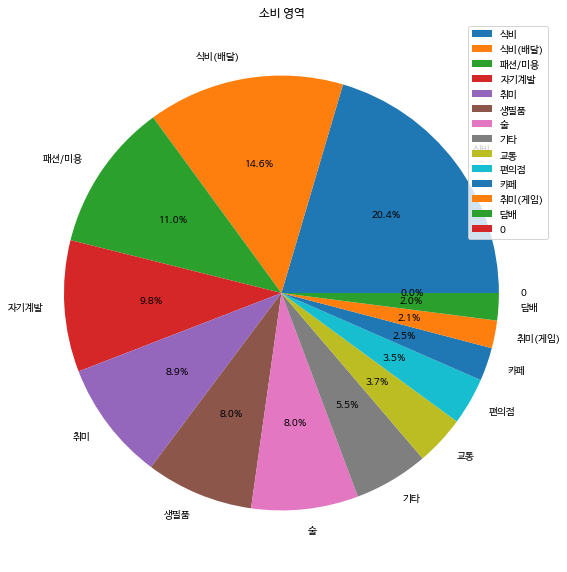

In [81]:
plt.figure(figsize=(20,10))
plt.title('소비 영역')
plt.pie(do['cost'], labels=do['domain'], autopct='%.1f%%')
plt.legend()
plt.show()

- 보면 식비에 지출한 비용의 비율이 가장 크게 차지했다. 이는 배달 음식과 외식 비용이 상당했다는 것을 나타낸다. 왜냐하면 마트에서 장을 보는 것은 생필품으로 분류했기 때문이다. 
- 그렇다면 식비에서 배달과 외식의 금액을 비교해보자

In [82]:
eat_out=last[last['domain']=='식비']

In [83]:
deli=last[last['domain']=='식비(배달)']

In [84]:
food=pd.concat([eat_out, deli])

In [85]:
food

,calendar,year,month,day,weekday,place,cost,ppl,dtch,sum,domain
3,2022-02-02,2022,02,02,2,명환,15000.0,0,0.0,15000.0,식비
26,2022-02-20,2022,02,20,6,맥도날드서초뱅뱅점,7400.0,0,0.0,7400.0,식비
29,2022-02-21,2022,02,21,0,(주)신세계푸드 노브랜드버거 고속터미널점,12000.0,0,0.0,12000.0,식비
31,2022-02-22,2022,02,22,1,(이영자치킨)고추치킨,23900.0,0,0.0,23900.0,식비
38,2022-02-23,2022,02,23,2,1인 보쌈세트외 1,18700.0,0,0.0,18700.0,식비
...,...,...,...,...,...,...,...,...,...,...,...
1135,2023-01-19,2023,01,19,3,(주)우아한형제들,20600.0,0,0.0,20600.0,식비(배달)
1137,2023-01-20,2023,01,20,4,(주)우아한형제들,23500.0,0,0.0,23500.0,식비(배달)
1144,2023-01-23,2023,01,23,0,(주)우아한형제들,25000.0,0,0.0,25000.0,식비(배달)
1147,2023-01-25,2023,01,25,2,(주)우아한형제들,13900.0,0,0.0,13900.0,식비(배달)


In [86]:
food1=food.groupby('domain').sum()

In [87]:
food1

,weekday,cost,dtch,sum
domain,,,,
식비,672,2960345.0,0.0,2960345.0
식비(배달),360,2117800.0,0.0,2117800.0


In [88]:
food2=food1['cost']

In [89]:
food2

domain
식비        2960345.0
식비(배달)    2117800.0
Name: cost, dtype: float64

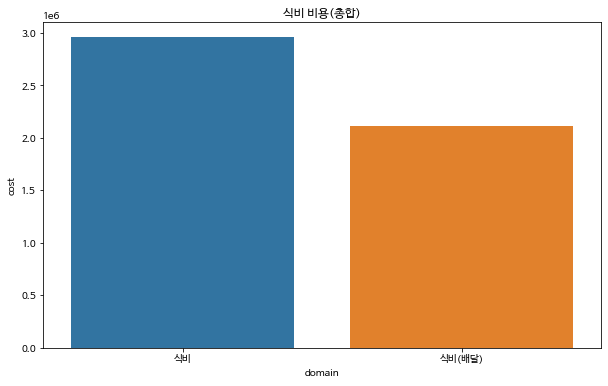

In [90]:
plt.figure(figsize=(10,6))
plt.title('식비 비용(총합)')
sns.barplot(x=food2.index, y=food2)

- 그냥 외식비용과 배달비용의 총 합계를 계산해보면 외식비용이 296만원으로 배달비용인 211만원보다 약 80만원 가량 높게 나왔다.

In [91]:
food3=food.groupby('domain').mean()

In [92]:
food3=food3['cost']

In [93]:
food3

domain
식비        13833.387850
식비(배달)    16807.936508
Name: cost, dtype: float64

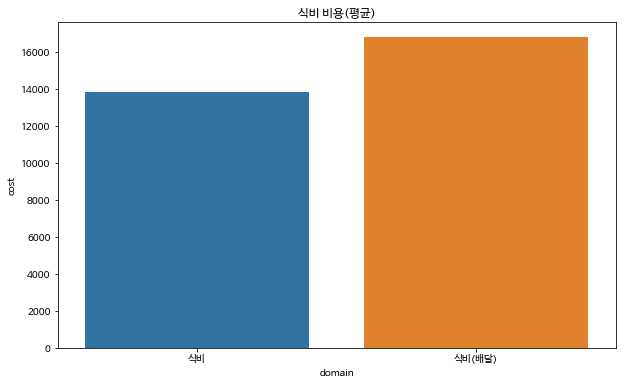

In [94]:
plt.figure(figsize=(10,6))
plt.title('식비 비용(평균)')
sns.barplot(x=food3.index, y=food3)

- 하지만 한 건당 평균 계산 비용을 보면 배달비용이 만6천800원으로 외식비용 만 3천 800원보다 더 높은 것을 알 수 있다.
- 즉, 내가 일년동안 식비로 지출한 돈 중에 배달로 쓴 비용이 더 낮았지만 그래도 가성비로 따지면 더 안좋은 소비인 것을 알 수 있다.
- 이 이유는 배달팁이 붙기 때문인 것으로 보인다. 실제로도 두 비용의 차이가 3천원인데 이는 일반적인 배달팁 비용과 일치한다.

###4) 어느 곳에서 지출을 줄일 수 있을까?


- 내가 생각하기에 의도적인 노력으로 지출을 줄일 수 있는 곳을 생각해보면 다음과 같이 나온다.

- 담배, 식비(배달), 식비(외식), 취미(게임) 등이다.

####4)-1 담배

- 일단 먼저 담배에 대한 소비량을 보겠다.

In [95]:
vape=last[last['domain']=='담배']

In [96]:
vape

,calendar,year,month,day,weekday,place,cost,ppl,dtch,sum,domain
475,2022-08-18,2022,08,18,3,마블(MARVEL) 당구장,50000.0,0,0.0,50000.0,담배
490,2022-08-22,2022,08,22,0,구\'s vape store,4000.0,0,0.0,4000.0,담배
649,2022-09-16,2022,09,16,4,***3009 김*은,35000.0,0,0.0,35000.0,담배
650,2022-09-16,2022,09,16,4,민주,30000.0,0,0.0,30000.0,담배
706,2022-09-29,2022,09,29,3,***3009 김*은,30000.0,0,0.0,30000.0,담배
795,2022-10-20,2022,10,20,3,***3009 김*은,30000.0,0,0.0,30000.0,담배
908,2022-11-22,2022,11,22,1,마블(MARVEL) 당구장,20000.0,0,0.0,20000.0,담배
957,2022-12-01,2022,12,01,3,크로스전자담배,7700.0,0,0.0,7700.0,담배
978,2022-12-06,2022,12,06,1,크로스전자담배,33000.0,0,0.0,33000.0,담배
1091,2023-01-05,2023,01,05,3,마블(MARVEL) 당구장,34000.0,0,0.0,34000.0,담배


In [97]:
vape['cost'].sum()

293700.0

- 8월부터 올해 1월까지 담배에 사용한 지출은 29만 3천 700원이다.

- 월별로 대충 평균적으로 6만원 정도 지출했다고 생각하고 일년치를 계산해보면 60만원이 나온다.

- 담배를 피지 않으면 일년에 60만원 정도를 아낄 수 있다는 뜻이다.

####4)-2 게임

- 다음은 내가 일년동안 피시방과 콘솔 게임등 게임에 지출한 금액들이다.

In [98]:
game=last[last['domain']=='취미(게임)']

In [99]:
game['sum'].sum()

298090.0

- 일년에 약 30만원 정도 게임에 지출을 하였다. 

- 엄청 큰 금액은 아니었다. 그리고 내가 게임을 하면서 얻은 효용을 생각하면 그리 나쁜 금액은 아닌 것 같다.

- 사실 게임은 금액보다도 게임에 소비된 시간이 아까운 느낌이다. 따라서 지출을 줄이기 위함도 있지만, 시간을 효율적으로 쓴다는 점에서 줄일 필요가 있다고 판단이 되었다. 

####4)-3 식비

- 앞서 살펴 보았지만 식비에 대한 총 지출을 다시 확인해보겠다.

In [100]:
food

,calendar,year,month,day,weekday,place,cost,ppl,dtch,sum,domain
3,2022-02-02,2022,02,02,2,명환,15000.0,0,0.0,15000.0,식비
26,2022-02-20,2022,02,20,6,맥도날드서초뱅뱅점,7400.0,0,0.0,7400.0,식비
29,2022-02-21,2022,02,21,0,(주)신세계푸드 노브랜드버거 고속터미널점,12000.0,0,0.0,12000.0,식비
31,2022-02-22,2022,02,22,1,(이영자치킨)고추치킨,23900.0,0,0.0,23900.0,식비
38,2022-02-23,2022,02,23,2,1인 보쌈세트외 1,18700.0,0,0.0,18700.0,식비
...,...,...,...,...,...,...,...,...,...,...,...
1135,2023-01-19,2023,01,19,3,(주)우아한형제들,20600.0,0,0.0,20600.0,식비(배달)
1137,2023-01-20,2023,01,20,4,(주)우아한형제들,23500.0,0,0.0,23500.0,식비(배달)
1144,2023-01-23,2023,01,23,0,(주)우아한형제들,25000.0,0,0.0,25000.0,식비(배달)
1147,2023-01-25,2023,01,25,2,(주)우아한형제들,13900.0,0,0.0,13900.0,식비(배달)


In [101]:
food['sum'].sum()

5078145.0

- 일년 동안 식비에만 쓴 금액이 총 507만 8145원이다. 

In [102]:
food2

domain
식비        2960345.0
식비(배달)    2117800.0
Name: cost, dtype: float64

- 다시 확인해보면, 외식은 296만 345원이고 배달은 211만 7800원이다. 

In [103]:
food3

domain
식비        13833.387850
식비(배달)    16807.936508
Name: cost, dtype: float64

- 한 번 먹는데 드는 비용 또한 만 3천원과 만 6천원 정도 든다.

- 이 비용을 줄이는 대신에 밀키트를 이용하면 식비 지출을 대폭 줄일 수 있을 것이라고 본다. 

- 밥을 굶을 수는 없으니 이에 대한 대체로 학식과 밀키트를 이용하면 좋을 것 같다는 생각을 했다. 

- 학식과 밀키트 모두 한 끼당 평균적으로 5천원에서 7천원정도 한다. 이는 외식과 배달 비용에 절반 혹은 3분의 1에 해당하는 금액이다. 

- 따라서 이와 같은 노력으로 식비를 줄일 수 있을 것 같다. 

####4)-4 술

- 내가 술에 지출한 비용은 다음과 같다.

In [104]:
alc=last[last['domain']=='술']
alc

,calendar,year,month,day,weekday,place,cost,ppl,dtch,sum,domain
66,2022-03-07,2022,03,07,0,18 김민기,16900.0,0,0.0,16900.0,술
68,2022-03-08,2022,03,08,1,큰손삼첩상(3가지선택),51600.0,0,0.0,51600.0,술
82,2022-03-12,2022,03,12,5,18 김동혁,23000.0,0,0.0,23000.0,술
100,2022-03-25,2022,03,25,4,인생집,64400.0,0,0.0,64400.0,술
161,2022-04-29,2022,04,29,4,해준,12000.0,0,0.0,12000.0,술
176,2022-05-06,2022,05,06,4,서동조,17500.0,0,0.0,17500.0,술
187,2022-05-12,2022,05,12,3,***1443 김*기,14000.0,0,0.0,14000.0,술
300,2022-06-26,2022,06,26,6,기녕,25000.0,0,0.0,25000.0,술
318,2022-07-02,2022,07,02,5,14 동언이 형,10600.0,0,0.0,10600.0,술
339,2022-07-07,2022,07,07,3,672 F&B,24000.0,0,0.0,24000.0,술


In [105]:
alc['cost'].sum()

1152000.0

- 일년에 술로 총 지출한 비용은 115만원 정도 된다. 
- 이 또한 적지 않은 금액이라 판단된다. 
- 개인적인 생각으로 술은 잘하지도 못하며 다음날에 피로도까지 고려하면, 나에게 좋지 못한 소비이다. 
- 앞으로의 목표에 집중하기 위해서라도 술은 줄이려는 노력이 필요해 보인다.

##2.요약 및 제언

지금까지 내 소비 데이터를 분석해본 결과 알 수 있었던 사실은 다음과 같다.

- 내가 일년 간 지출한 비용은 총 1287만원 정도이다.
- 나는 하루에 평균 38,792원 정도를 소비했다.
- 요일에 따른 금액의 차이에는 크게 특별한 것이 없었다.
- 월별로 보았을 때는 주로 방학 때 지출이 커지는 패턴을 확인할 수 있었다.
- 또한 학기중에는 과 행사에 많이 참여할 수록 지출 또한 커졌다.
- 소비 영역에서는 식비가 가장 큰 비중을 참여했다. 총 500만원 정도를 소비했다.
- 내가 생각하기에 의미 없는 지출은 담배, 게임, 식비, 술 이었다. 이 세 분야의 지출을 없애면 250만원 정도를 세이브 할 수 있을 것이다.


이에 대한 해결방안 및 목표는 다음과 같다.
- 일년 총 지출을 최소 1100만원 이하로 만든다.
- 매일매일 내 지출을 계산해보면서 하루에 3만원 이하의 지출을 하기 위해 노력한다.
- 방학 때 지출이 커지는 이유는 돈을 벌어서 여행을 가거나 취미생활이 늘어났기 때문이다. 따라서 알바를 해서 번 돈은 일정 금액 이상 저축을 한다.
- 과행사는 어차피 이제 4학년에 올라가고 대학원 준비 때문에 바쁠 것으로 예상되기 때문에 자연스레 참여하지 않을 것으로 보인다.
- 식비는 밀키트와 학식으로 대체하여 지출을 줄이려는 노력이 필요하다.
- 줄인 비용을 전체 소비 중 책과 강의 등 자기계발 영역의 비중을 높이는 쪽으로 하려 한다.
 

이 프로젝트의 한계라고 할 수 있는 점은 새는 정보가 있었다는 것이다. 

그 이유는 출처를 알 수 없는 지출이 있었다는 점 때문이다. 

어제 무엇을 먹었는지도 기억못하는게 사람이다. 나 또한 내가 일년동안 쓴 지출을 일일히 기억할 수 없었기 때문에 출처를 알 수 없는 지출을 기타 항목으로 두었다.

조금더 정밀하게 나의 소비 패턴을 알기 위해서는 이와 같은 부족한 정보량을 없애는 일이 필요하다. 

또한 다음에는 더치페이 데이터를 두지 않고 직접적인 소비를 얼만큼 했는지 알 수 있게 하려고 한다.

따라서 한 달마다 꾸준히 내 데이터를 업데이트해서 후에도 계속해도 분석하는 과정이 필요한 것으로 보인다.